In [4]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Display settings
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")


In [6]:
# Set the file path
file_path = r"D:\New folder (2)\unified mentor project\IBM_-HR-Employee-Attrition.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Preview the first 5 rows
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
# Shape of the dataset
print("Dataset Shape:", df.shape)

# Data types and non-null values
df.info()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Dataset Shape: (1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14

In [10]:
# Copy of original dataset
df_original = df.copy()

# Check categorical features
categorical_cols = df.select_dtypes(include='object').columns
print("Categorical Columns:\n", categorical_cols)


Categorical Columns:
 Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [18]:
# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding on all categorical columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Preview the changes
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [14]:
# Check duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates if any
if duplicates > 0:
    df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


In [16]:
# Check missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])


Missing Values:
 Series([], dtype: int64)


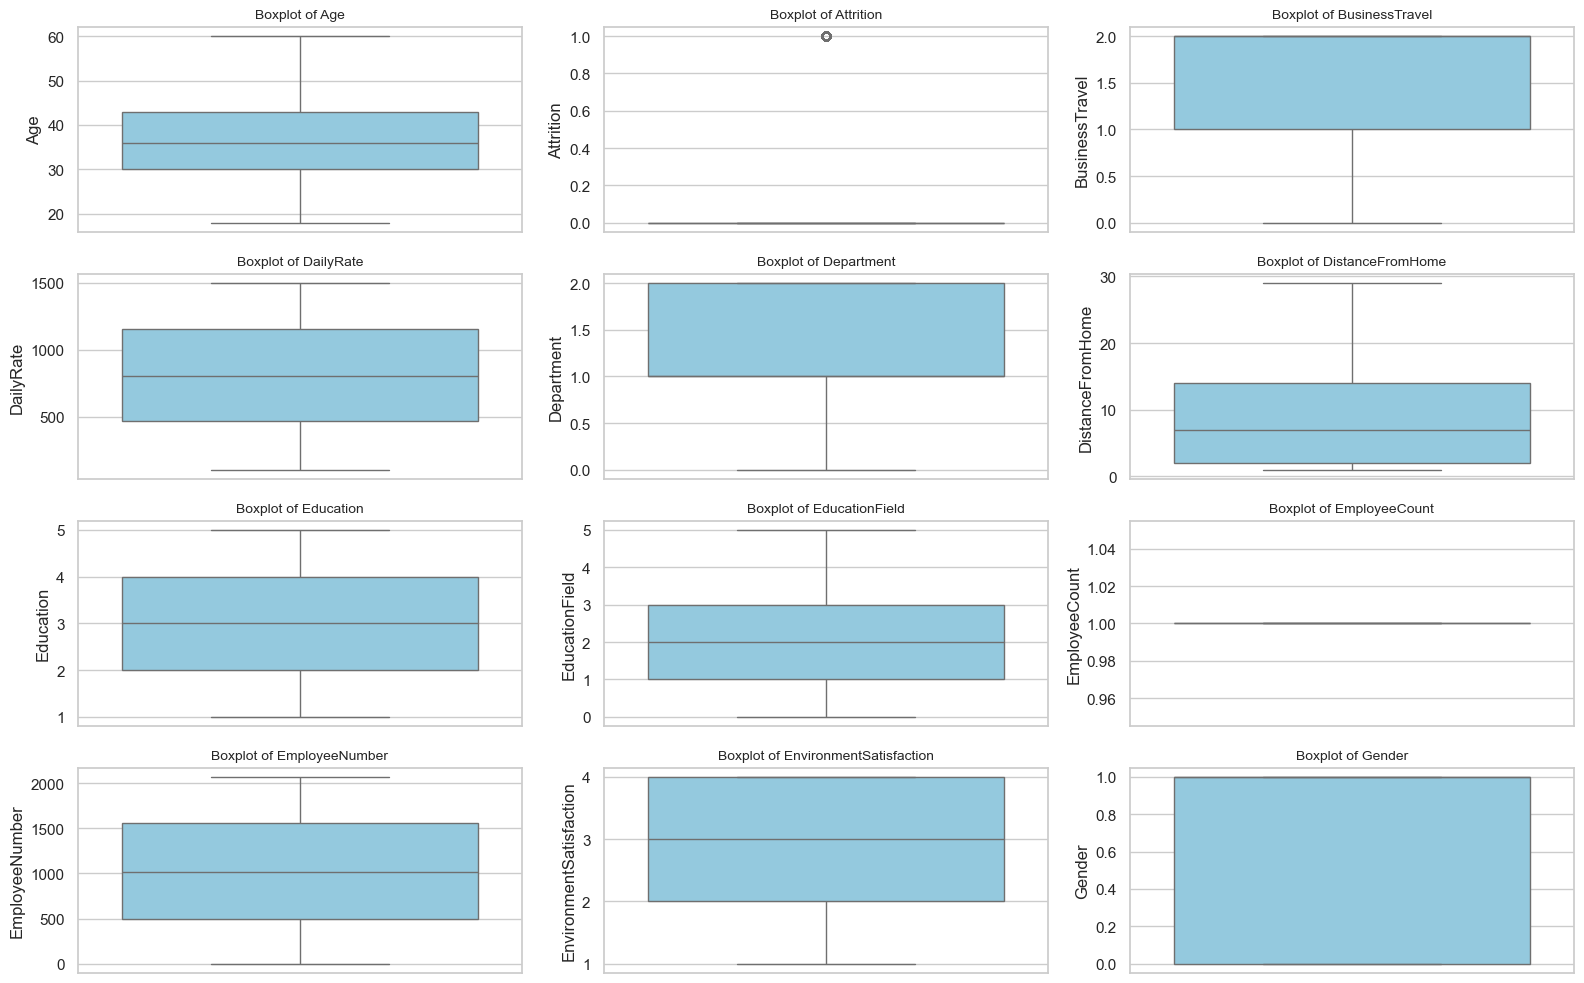

In [20]:
# Plot boxplots for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_cols[:12], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=10)
    plt.tight_layout()


In [22]:
# Example: Renaming if needed
df.rename(columns={'EmployeeNumber': 'employee_id', 'MonthlyIncome': 'monthly_income'}, inplace=True)


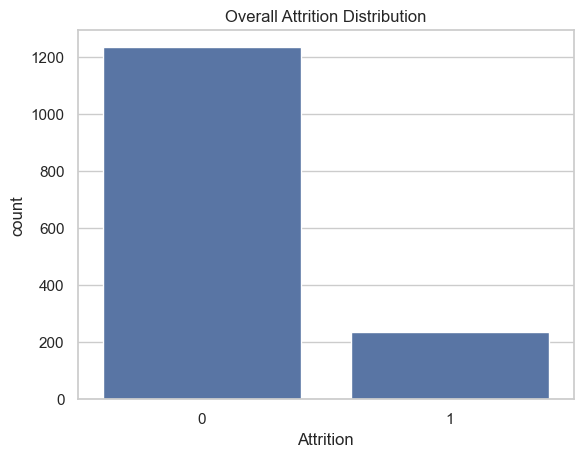

Attrition Rate:
 Attrition
0    83.877551
1    16.122449
Name: proportion, dtype: float64


In [24]:
sns.countplot(x='Attrition', data=df)
plt.title('Overall Attrition Distribution')
plt.show()

# Calculate percentages
attrition_percent = df['Attrition'].value_counts(normalize=True) * 100
print("Attrition Rate:\n", attrition_percent)


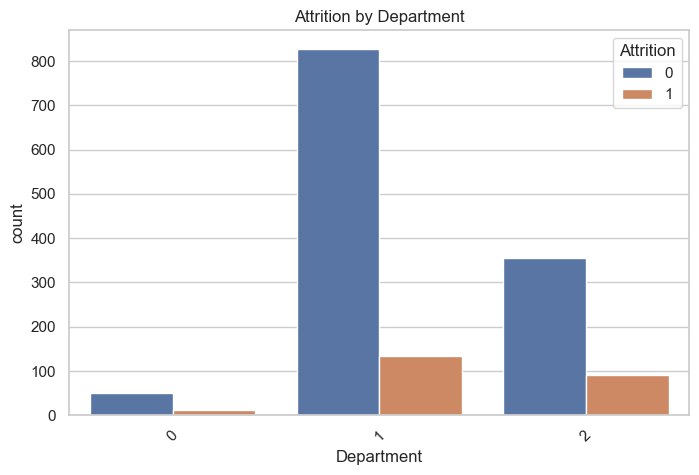

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title("Attrition by Department")
plt.xticks(rotation=45)
plt.show()


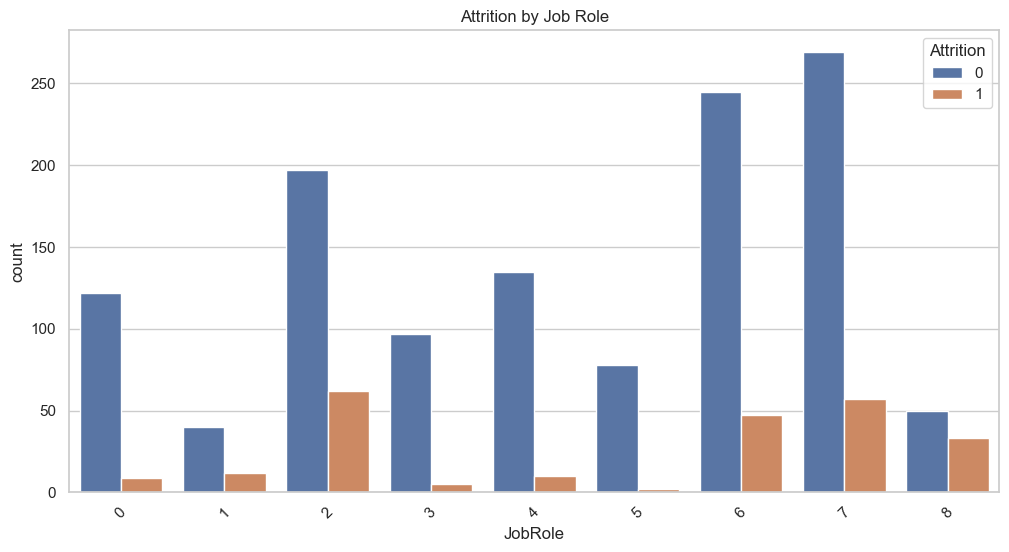

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.title("Attrition by Job Role")
plt.xticks(rotation=45)
plt.show()


In [36]:
print(df.columns)


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'employee_id', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'monthly_income', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [38]:
# Remove leading/trailing spaces in column names
df.columns = df.columns.str.strip()


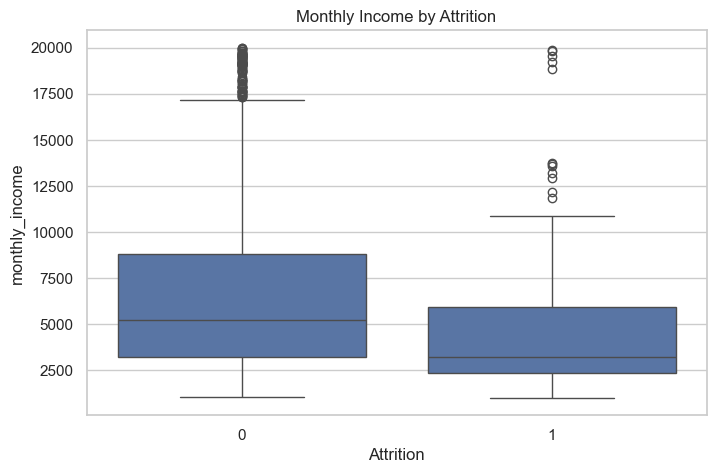

In [44]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Attrition', y='monthly_income', data=df)
plt.title("Monthly Income by Attrition")
plt.show()

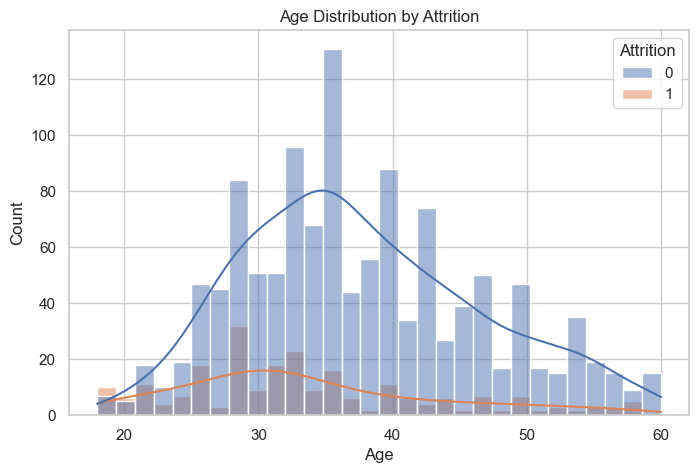

In [32]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Attrition', kde=True, bins=30)
plt.title("Age Distribution by Attrition")
plt.show()


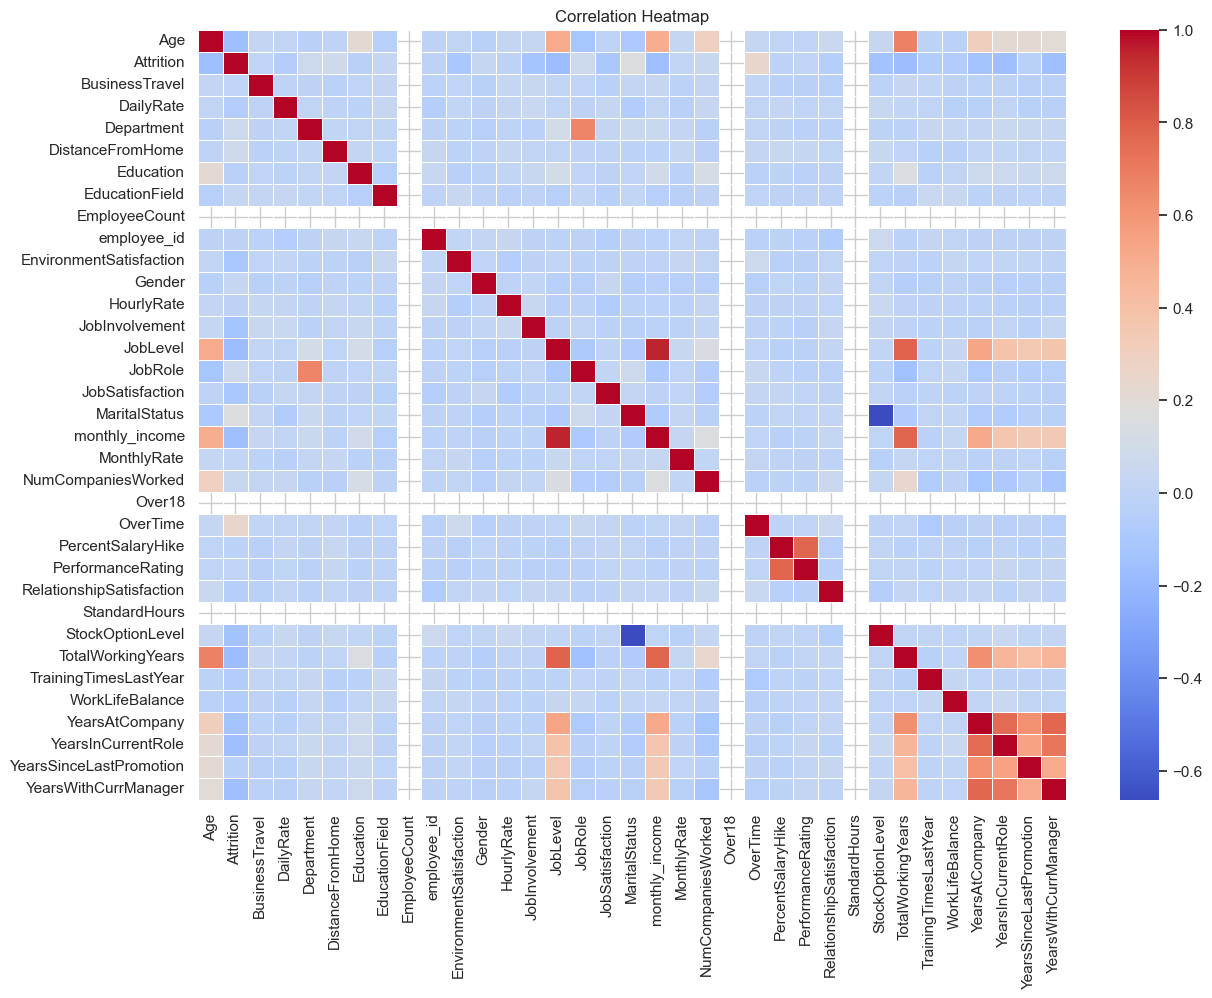

In [34]:
plt.figure(figsize=(14,10))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [46]:
# 1. Copy the original DataFrame to avoid modifying it directly
df_fe = df.copy()

# 2. Drop columns that won’t help in prediction (constant or irrelevant)
df_fe.drop(columns=['employee_id', 'EmployeeCount', 'StandardHours', 'Over18'], inplace=True)

# 3. Encode categorical variables using Label Encoding or One-Hot Encoding
from sklearn.preprocessing import LabelEncoder

# Label encode binary categorical columns
label_enc = LabelEncoder()
binary_cols = ['Attrition', 'Gender', 'OverTime']

for col in binary_cols:
    df_fe[col] = label_enc.fit_transform(df_fe[col])

# One-Hot encode other categorical columns
df_fe = pd.get_dummies(df_fe, columns=[
    'BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'
], drop_first=True)

# 4. Check for nulls (if any were introduced during encoding)
print("Null values after encoding:", df_fe.isnull().sum().sum())

# 5. View final feature set
print("Final shape after feature engineering:", df_fe.shape)
df_fe.head()


Null values after encoding: 0
Final shape after feature engineering: (1470, 45)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_1,JobRole_2,JobRole_3,JobRole_4,JobRole_5,JobRole_6,JobRole_7,JobRole_8,MaritalStatus_1,MaritalStatus_2
0,41,1,1102,1,2,2,0,94,3,2,...,False,False,False,False,False,False,True,False,False,True
1,49,0,279,8,1,3,1,61,2,2,...,False,False,False,False,False,True,False,False,True,False
2,37,1,1373,2,2,4,1,92,2,1,...,False,True,False,False,False,False,False,False,False,True
3,33,0,1392,3,4,4,0,56,3,1,...,False,False,False,False,False,True,False,False,True,False
4,27,0,591,2,1,1,1,40,3,1,...,False,True,False,False,False,False,False,False,True,False


In [48]:
# Calculate average tenure
avg_tenure = df['YearsAtCompany'].mean()

# Display result rounded to two decimals
print(f'📌 Average years of employee to leave the company: {avg_tenure:.2f} years')


📌 Average years of employee to leave the company: 7.01 years


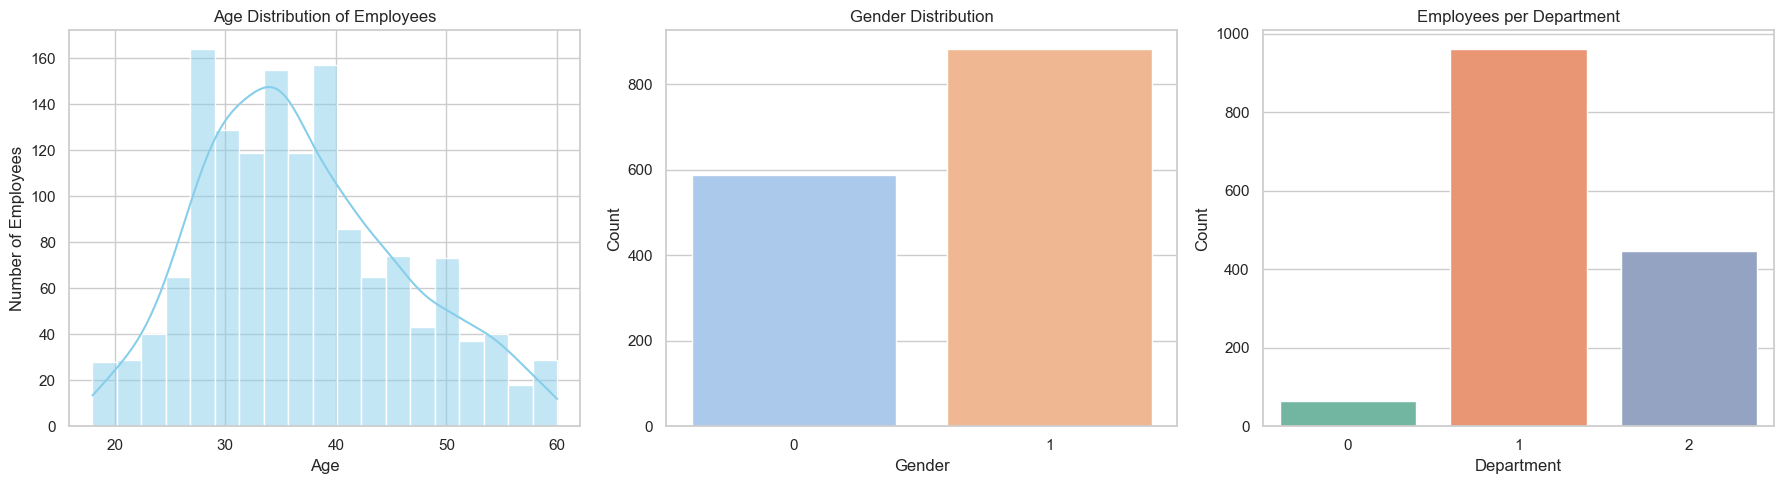

In [50]:
# Set up subplots for Age, Gender, and Department
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Age distribution with KDE curve
sns.histplot(data=df, x='Age', kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Age Distribution of Employees')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Number of Employees')

# Gender distribution
sns.countplot(data=df, x='Gender', palette='pastel', ax=axes[1])
axes[1].set_title('Gender Distribution')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

# Department distribution
sns.countplot(data=df, x='Department', palette='Set2', ax=axes[2])
axes[2].set_title('Employees per Department')
axes[2].set_xlabel('Department')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [56]:
# Function to calculate attrition rate by a specific column
def calculate_attrition_rate(df, column):
    attrition_counts = df.groupby([column, 'Attrition']).size().unstack(fill_value=0)
    attrition_rate = (attrition_counts['Yes'] / attrition_counts.sum(axis=1)) * 100
    attrition_rate_df = attrition_rate.reset_index()
    attrition_rate_df.columns = [column, 'AttritionRate']
    return attrition_rate_df


In [58]:
print(df['Attrition'].unique())


[1 0]


KeyError: 'Yes'

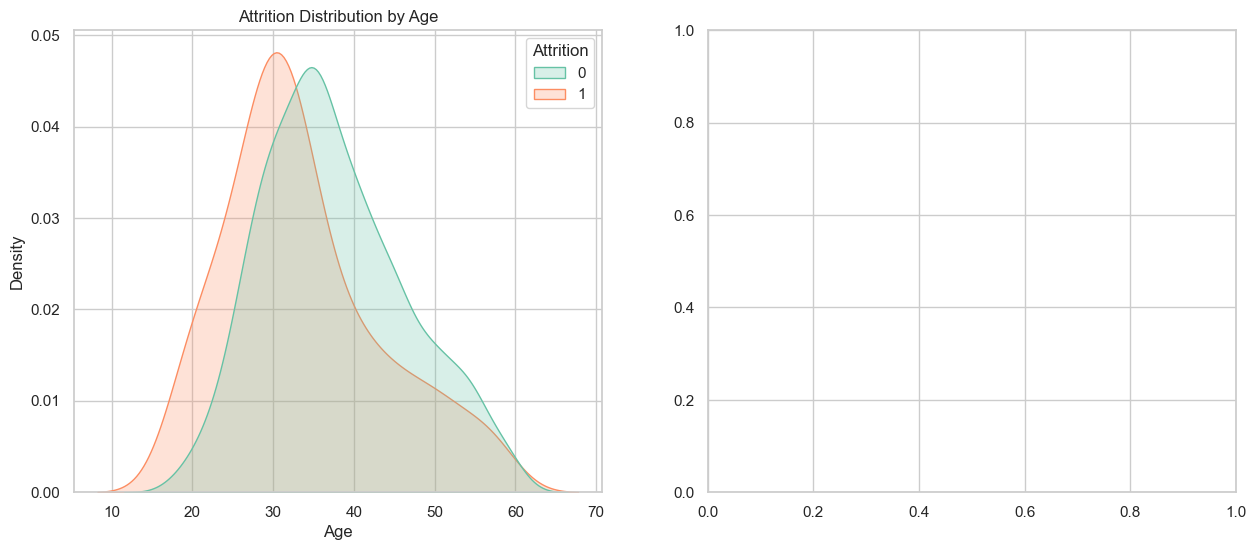

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot 1: KDE Plot of Age distribution by Attrition
sns.kdeplot(data=df, x='Age', hue='Attrition', fill=True, common_norm=False, palette='Set2', ax=axes[0])
axes[0].set_title('Attrition Distribution by Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Density')

# Plot 2: Bar plot showing Attrition Rate by Gender
attrition_rate_df = calculate_attrition_rate(df, 'Gender')
sns.barplot(data=attrition_rate_df, x='Gender', y='AttritionRate', palette='pastel', ax=axes[1])
axes[1].set_title('Attrition Rate by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Attrition Rate (%)')

plt.tight_layout()
plt.show()
